You are working at the bank as a data analyst, your task is to perform a comprehensive statistical analysis
of the "Bank Marketing" dataset. Your analysis should cover various statistics topics, including Descriptive
Statistics, Probability and Distributions.

1. Calculate descriptive statistics and present a summary for relevant variables in the dataset.
Describe the central tendencies and variability in the data. You must justify the choice of the
variables in this point. [0 – 25%]
2. Create two visualisations (e.g., histograms, box plots) to represent the distribution of the numeric
variables that you consider relevant. What patterns can you observe? [0 – 10%]
3. Calculate and interpret probabilities that might affect the success of a marketing campaign. Why
these variables are relevant? [0 -15%]
4. Analyse a subset of the dataset related and calculate a specified probability of success. With this
probability, place a Binomial distribution and explain why this result is important in a banking
marketing campaign. [0 - 20%]
5. Use Normal distribution to explain a main variable. Visualise the data of your variable and
determine whether this could be considered normally distributed or not. [0 – 15%]
6. Present all your results in a form of a report (minimum 1700 words). The report should contain an
executive introduction, body, and conclusion with suggestions for the marketing campaign. [0-15%]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df = pd.read_csv("Bank_Mkt_Campaign.csv")

# Objective

### The aim of our analysis is to investigate who is the profile of the population more likely to successfully subscribe to a bank term deposit.

# Index
1. Data Overview

> 1.1 Data Cleaning

2. Comprehensive Analysis of Features

> 2.1 Campaign Success

> 2.1.1 Analysis of Relative Frequencies

> 2.2 Campaign Results by Group of Ages

> 2.2.1 Analysis of Relative Frequencies

> 2.3 Campaign Results by Marital Status

> 2.3.1 Analysis of Relative Frequencies

> 2.4 Campaign Results by Job

> 2.4.1 Analysis of Relative Frequencies

> 2.5 Campaign Results by Education

> 2.5.1 Analysis of Relative Frequencies

> 2.6 Campaign Results by Average Balance in the Bank

> 2.6.1 Analysis of Relative Frequencies

> 2.7 Campaign Results by Housing Loan Status

> 2.7.1 Analysis of Relative Frequencies

> 2.8 Campaign Results by Personal Loan Status

> 2.8.1 Analysis of Relative Frequencies

> 2.9 Campaign Results by Bank Debt Status

> 2.9.1 Analysis of Relative Frequencies

> 2.9 Summary analysis

> 2.9.1 Numerical Features

> 2.9.1.1 Distribution of age

> 2.9.1.2 Distribution of average balance

> 2.9.2 Categorical Features

> 2.9.2.1 Job vs Campaign Results

> 2.9.2.2 Marital vs Campaign Results

> 2.9.2.3 Education vs Campaign Results

> 2.9.2.4 Age group vs Campaign Results

> 2.9.2.5 Balance classification vs Campaign Results

> 2.9.3 Definition of Potencial Customer

3. Exploratory Data Analysis of Insightful Features

> 3.1. What is the probability adult people sucesfully suscribe to a term deposit?

> 3.2. What is the probability that customers from the database are adults? 

> 3.3. What is the probability that customers from the database are single?

> 3.4 What is the probability that customers have a standard average balance in their bank accounts?

> 3.5 What is the probability that customers have a tertiary level education?

> 3.6 Features to focus on in order to increase Potencial Customer

4. Probability of managers succesfully subscribe a term deposit.

1. Data overview

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [4]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [5]:
df.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [6]:
df.housing.value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [7]:
df.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [8]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [9]:
df.contact.value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [10]:
df.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [11]:
df.month.value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [12]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [13]:
pd.unique(df[['default','job','contact','month','poutcome']].values.ravel('K'))

array(['no', 'yes', 'unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown', 'cellular', 'telephone', 'oct',
       'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov', 'sep',
       'mar', 'dec', 'failure', 'other', 'success'], dtype=object)

> 1.1 Data Cleaning

In [14]:
df.replace('unknown', np.nan, inplace=True)

In [15]:
missing_values = df.isnull().sum()
missing_values

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

<AxesSubplot:>

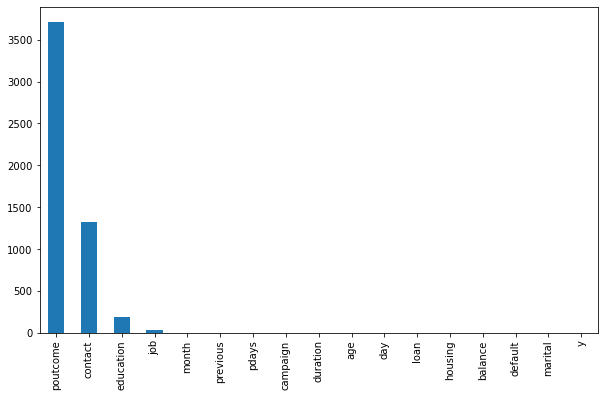

In [16]:
df.isnull().sum().nlargest(20).plot(kind='bar', figsize=(10, 6))

### Note about previous code
While it may appear insignificant to retain the column 'poutcome' given that we have only gathered data from 816 individuals out of a total of 4521, we have determined that it is still a sufficient sample size to warrant its inclusion in future analyses.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4483 non-null   object
 2   marital    4521 non-null   object
 3   education  4334 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    3197 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   816 non-null    object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Note

- We are dropping 'pdays' column since we might do not consider relevant to get to know the number of days that passed by after the client was last contacted from a previous campaign.

- We are dropping 'duration' since following UCI Irvine Machine Learning Repository this data is considered highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- We are dropping 'day' column since we might do not consider relevant to get to know the specific day clients were contacted.

- We are dropping 'contact' column since we might do not consider relevant to get to know the way clients were contacted (We are considering cellulars and telephone as the same way of contacting).

In [18]:
df2=df.drop('pdays',axis=1)
df2=df2.drop('duration',axis=1)
df2=df2.drop('day',axis=1)
df2=df2.drop('contact',axis=1)

df2.rename(columns={'default': 'bank_debt',
                    'balance': 'avg_balance',
                    'housing': 'housing_loan',
                    'loan': 'personal_loan',
                    'campaign': 'n_contacts_done',
                    'poutcome':'results_prev_campains',
                    'y':'campaign_results',
                    'previous':'pre_n_contacts_done'}, inplace=True)

# Convert "success" and "failure" to binary (1 or 0) in "results_prev_campains"
# Convert "yes" and "no" to binary (1 or 0) in "bank_debt", "campaign_results","results_prev_campains","housing_loan","personal_loan"
df2['bank_debt'] = df2['bank_debt'].map({'yes': 1, 'no': 0})
df2['results_prev_campains'] = df2['results_prev_campains'].map({'success': 1, 'failure': 0,'other':0})
df2['campaign_results'] = df2['campaign_results'].map({'yes': 1, 'no': 0})
df2['housing_loan'] = df2['housing_loan'].map({'yes': 1, 'no': 0})
df2['personal_loan'] = df2['personal_loan'].map({'yes': 1, 'no': 0})

### Note about previous code
In order to simplify the analysis in the outcome_prev_campains column, we have decided to consider 'other' data values as 'failures', as we could consider 'other' as customers who did not successfully subscribe to a term deposit.

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4521 non-null   int64  
 1   job                    4483 non-null   object 
 2   marital                4521 non-null   object 
 3   education              4334 non-null   object 
 4   bank_debt              4521 non-null   int64  
 5   avg_balance            4521 non-null   int64  
 6   housing_loan           4521 non-null   int64  
 7   personal_loan          4521 non-null   int64  
 8   month                  4521 non-null   object 
 9   n_contacts_done        4521 non-null   int64  
 10  pre_n_contacts_done    4521 non-null   int64  
 11  results_prev_campains  816 non-null    float64
 12  campaign_results       4521 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 459.3+ KB


In [20]:
df2.tail(10)

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results
4511,46,blue-collar,married,secondary,0,668,1,0,may,2,0,NaN,1
4512,40,blue-collar,married,secondary,0,1100,1,0,may,2,0,NaN,0
4513,49,blue-collar,married,secondary,0,322,0,0,aug,2,0,NaN,0
4514,38,blue-collar,married,secondary,0,1205,1,0,apr,4,1,0.0,0
4515,32,services,single,secondary,0,473,1,0,jul,5,0,NaN,0
4516,33,services,married,secondary,0,-333,1,0,jul,5,0,NaN,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,may,1,0,NaN,0
4518,57,technician,married,secondary,0,295,0,0,aug,11,0,NaN,0
4519,28,blue-collar,married,secondary,0,1137,0,0,feb,4,3,0.0,0
4520,44,entrepreneur,single,tertiary,0,1136,1,1,apr,2,7,0.0,0


2. Comprehensive Analysis of Features

In [21]:
df2.describe()

,age,bank_debt,avg_balance,housing_loan,personal_loan,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.170095,0.016810,1422.657819,0.566025,0.152842,2.793630,0.542579,0.158088,0.115240
std,10.576211,0.128575,3009.638142,0.495676,0.359875,3.109807,1.693562,0.365047,0.319347
min,19.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,69.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,444.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,49.000000,0.000000,1480.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
max,87.000000,1.000000,71188.000000,1.000000,1.000000,50.000000,25.000000,1.000000,1.000000


### Note
We have considered ignoring the 'Month' column for further analysis, as we feel that the data is too spread out over the year, with no particular month to consider.

In [22]:
value_counts=df2['month'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'month':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,month,Frequency,relative_frequencies
0,may,1398,0.309224
1,jul,706,0.156160
2,aug,633,0.140013
3,jun,531,0.117452
4,nov,389,0.086043
5,apr,293,0.064809
6,feb,222,0.049104
7,jan,148,0.032736
8,oct,80,0.017695
9,sep,52,0.011502


### Note
While it may appear insignificant to retain the column 'poutcome' given that we have only gathered data from 816 individuals out of a total of 4521, we have determined that it is still a sufficient sample size to warrant its inclusion in future analyses.

In [23]:
value_counts=df2['results_prev_campains'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'results_prev_campains':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,results_prev_campains,Frequency,relative_frequencies
0,0.0,687,0.151958
1,1.0,129,0.028534


> 2.1 Campaign Success

In [24]:
campaing_results=df2.groupby('campaign_results',axis=0).count()
campaing_results

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,month,n_contacts_done,pre_n_contacts_done,results_prev_campains
campaign_results,,,,,,,,,,,,
0,4000,3969,4000,3832,4000,4000,4000,4000,4000,4000,4000,632
1,521,514,521,502,521,521,521,521,521,521,521,184


### Campaign Success

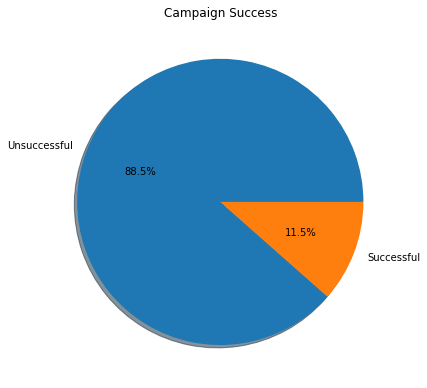

In [25]:
# Assuming you have the counts for 'campaign_results'
campaign_results_counts = df2['campaign_results'].value_counts()

# Define the labels for the pie chart
labels = ['Unsuccessful', 'Successful']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(campaign_results_counts, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Campaign Success')
plt.tight_layout()

plt.show()

In [26]:
value_counts=df2['campaign_results'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'campaign_results':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,campaign_results,Frequency,relative_frequencies
0,0,4000,0.88476
1,1,521,0.11524


> 2.2 Campaign Results by Group of Ages

In order to study how sucessful was the campaing by group of ages, we have decided to creat a new column grouping the column 'age' by group of age where young is population from 19 to 34, adult from 35 to 59 and elderly from 60 to 87.

In [27]:
max_age = df2['age'].max()
print("Maximum Age:", max_age)

Maximum Age: 87


In [28]:
min_age = df2['age'].min()
print("Minimum Age:", min_age)

Minimum Age: 19


In [29]:
age_distribution = [19, 35, 60, float('inf')]
age_labels = ['Young', 'Adult', 'Elderly']
df2['age_group'] = pd.cut(df2['age'], bins=age_distribution, labels=age_labels, right=False)

In [30]:
df2.head()

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group
0,30,unemployed,married,primary,0,1787,0,0,oct,1,0,NaN,0,Young
1,33,services,married,secondary,0,4789,1,1,may,1,4,0.0,0,Young
2,35,management,single,tertiary,0,1350,1,0,apr,1,1,0.0,0,Adult
3,30,management,married,tertiary,0,1476,1,1,jun,4,0,NaN,0,Young
4,59,blue-collar,married,secondary,0,0,1,0,may,1,0,NaN,0,Adult


In [31]:
ages_reached=df2.groupby('age_group',axis=0).count()
ages_reached

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results
age_group,,,,,,,,,,,,,
Young,1472,1468,1472,1437,1472,1472,1472,1472,1472,1472,1472,257,1472
Adult,2875,2846,2875,2739,2875,2875,2875,2875,2875,2875,2875,508,2875
Elderly,174,169,174,158,174,174,174,174,174,174,174,51,174


### Group of ages reached

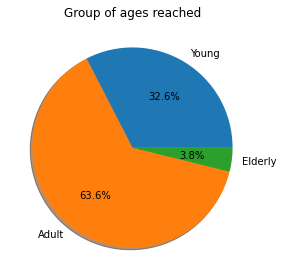

In [32]:
age_group=['Young','Adult','Elderly']
ages_reached['campaign_results'].plot(kind='pie', labels=age_group,radius=1,autopct='%1.1f%%', shadow = True)
plt.title('Group of ages reached')
plt.ylabel("")
plt.tight_layout()

### Campaign Results by Age Group

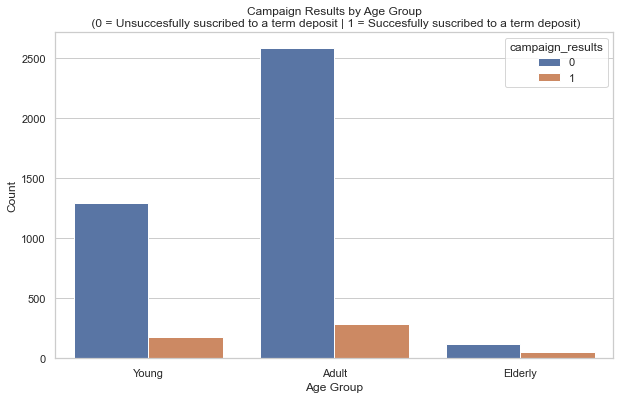

In [33]:
young_data = df2[df2['age_group'] == 'Young']
adult_data = df2[df2['age_group'] == 'Adult']
elderly_data = df2[df2['age_group'] == 'Elderly']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=df2, x='age_group', hue='campaign_results')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Campaign Results by Age Group\n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')

plt.show()

In [34]:
value_counts=df2['age'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'age':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,age,Frequency,relative_frequencies
0,34,231,0.051095
1,32,224,0.049547
2,31,199,0.044017
3,36,188,0.041584
4,33,186,0.041141
...,...,...,...
62,68,2,0.000442
63,87,1,0.000221
64,81,1,0.000221
65,86,1,0.000221


### Campaign Results for Adult Group of Age

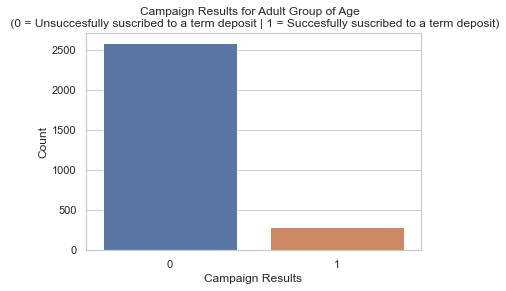

In [35]:
adult_data = df2[df2['age_group'] == 'Adult']

sns.countplot(data=adult_data, x='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results for Adult Group of Age  \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

In [36]:
adult_data = df2[df2['age_group'] == 'Adult']
adult_data_counts = adult_data['campaign_results'].value_counts()

print(adult_data_counts)

0    2587
1     288
Name: campaign_results, dtype: int64


### Campaign Results for Young Group of Age

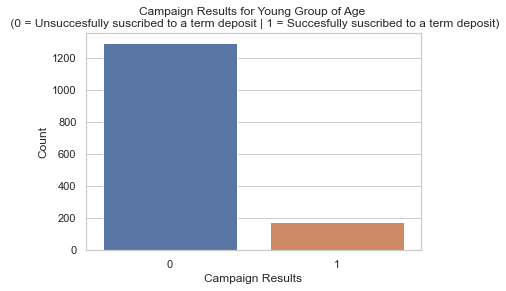

In [37]:
young_data = df2[df2['age_group'] == 'Young']

sns.countplot(data=young_data, x='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results for Young Group of Age \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

In [38]:
young_data = df2[df2['age_group'] == 'Young']
young_data_counts = young_data['campaign_results'].value_counts()

print(young_data_counts)

0    1294
1     178
Name: campaign_results, dtype: int64


> 2.2.1 Analysis of Relative Frequencies

In [39]:
value_counts=df2['age'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'age':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,age,Frequency,relative_frequencies
0,34,231,0.051095
1,32,224,0.049547
2,31,199,0.044017
3,36,188,0.041584
4,33,186,0.041141
...,...,...,...
62,68,2,0.000442
63,87,1,0.000221
64,81,1,0.000221
65,86,1,0.000221


In [40]:
value_counts=df2['age_group'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'age':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,age,Frequency,relative_frequencies
0,Adult,2875,0.635921
1,Young,1472,0.325592
2,Elderly,174,0.038487


In [41]:
#In order to be able to work with the data we have decided to convert it in numerical data
#df2['age_group'] = df2['age_group'].map({'Young': 0, 'Adult': 1,'Elderly':2})

> 2.3 Campaign Results by Marital Status

In [42]:
campaign_performance=df2.groupby('marital',axis=0).count()
campaign_performance

,age,job,education,bank_debt,avg_balance,housing_loan,personal_loan,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group
marital,,,,,,,,,,,,,
divorced,528,527,504,528,528,528,528,528,528,528,85,528,528
married,2797,2767,2680,2797,2797,2797,2797,2797,2797,2797,492,2797,2797
single,1196,1189,1150,1196,1196,1196,1196,1196,1196,1196,239,1196,1196


### Marital status reached

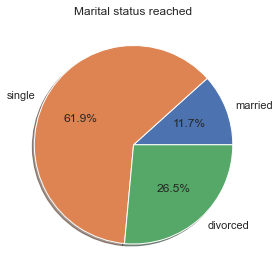

In [43]:
marital_status=['married','single','divorced']
campaign_performance['campaign_results'].plot(kind='pie', labels=marital_status,radius=1,autopct='%1.1f%%', shadow = True)
plt.title('Marital status reached')
plt.ylabel("")
plt.tight_layout()

### Campaign Results by Marital Status

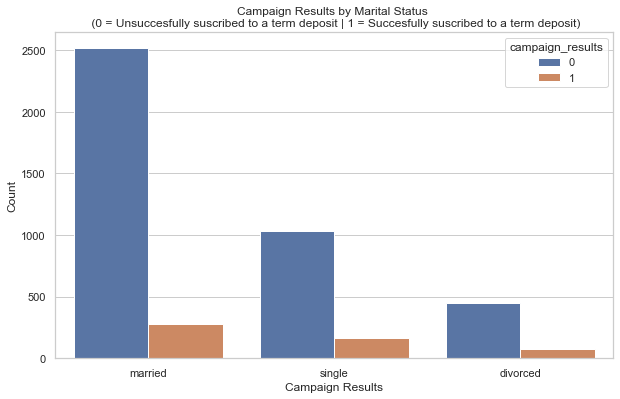

In [44]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=df2, x='marital', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Marital Status \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')

plt.show()

### Campaign Results for Single Marital Status Group

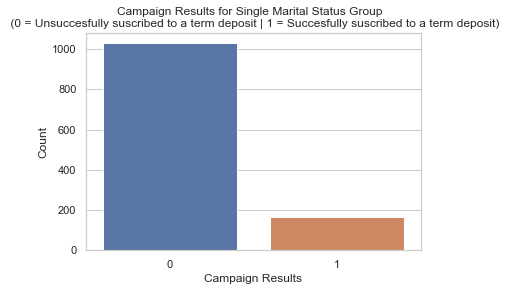

In [45]:
single_data = df2[df2['marital'] == 'single']

sns.countplot(data=single_data, x='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results for Single Marital Status Group  \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

In [46]:
single_data = df2[df2['marital'] == 'single']
single_data_counts = single_data['campaign_results'].value_counts()

print(single_data_counts)

0    1029
1     167
Name: campaign_results, dtype: int64


### Campaign Results for Married Group

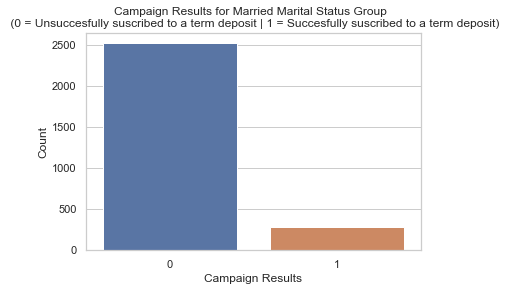

In [47]:
single_data = df2[df2['marital'] == 'married']

sns.countplot(data=single_data, x='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results for Married Marital Status Group  \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

In [48]:
married_data = df2[df2['marital'] == 'married']

married_data_counts = married_data['campaign_results'].value_counts()

print(married_data_counts)

0    2520
1     277
Name: campaign_results, dtype: int64


> 2.3.1 Analysis of Relative Frequencies

In [49]:
value_counts=df2['marital'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'marital':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,marital,Frequency,relative_frequencies
0,married,2797,0.618668
1,single,1196,0.264543
2,divorced,528,0.116788


> 2.4 Campaign Results by job

In [50]:
campaign_performance=df2.groupby('job',axis=0).count()
campaign_performance

,age,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group
job,,,,,,,,,,,,,
admin.,478,478,461,478,478,478,478,478,478,478,108,478,478
blue-collar,946,946,905,946,946,946,946,946,946,946,152,946,946
entrepreneur,168,168,157,168,168,168,168,168,168,168,23,168,168
housemaid,112,112,107,112,112,112,112,112,112,112,18,112,112
management,969,969,942,969,969,969,969,969,969,969,186,969,969
retired,230,230,216,230,230,230,230,230,230,230,49,230,230
self-employed,183,183,179,183,183,183,183,183,183,183,28,183,183
services,417,417,404,417,417,417,417,417,417,417,62,417,417
student,84,84,68,84,84,84,84,84,84,84,22,84,84


### Jobs overview

<Figure size 720x720 with 0 Axes>

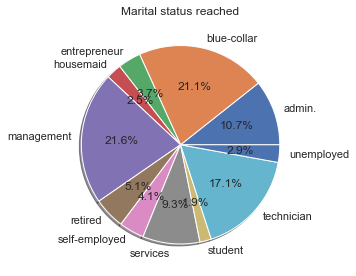

<Figure size 720x720 with 0 Axes>

In [51]:
jobs_overview=['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed']
campaign_performance['campaign_results'].plot(kind='pie', labels=jobs_overview,radius=1,autopct='%1.1f%%', shadow = True)

plt.title('Marital status reached')
plt.ylabel("")
plt.tight_layout()
plt.figure(figsize=(10, 10))

In [52]:
campaign_performance.reset_index(inplace=True)

In [53]:
campaign_performance.head()

,job,age,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group
0,admin.,478,478,461,478,478,478,478,478,478,478,108,478,478
1,blue-collar,946,946,905,946,946,946,946,946,946,946,152,946,946
2,entrepreneur,168,168,157,168,168,168,168,168,168,168,23,168,168
3,housemaid,112,112,107,112,112,112,112,112,112,112,18,112,112
4,management,969,969,942,969,969,969,969,969,969,969,186,969,969


In [54]:
campaign_performance.columns=['job','age','marital','education','ank_debt','avg_balance','housing_loan','personal_loan','month','n_contacts_done','pre_n_contacts_done','results_prev_campains','campaign_results','age_group']

In [55]:
campaign_performance

,job,age,marital,education,ank_debt,avg_balance,housing_loan,personal_loan,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group
0,admin.,478,478,461,478,478,478,478,478,478,478,108,478,478
1,blue-collar,946,946,905,946,946,946,946,946,946,946,152,946,946
2,entrepreneur,168,168,157,168,168,168,168,168,168,168,23,168,168
3,housemaid,112,112,107,112,112,112,112,112,112,112,18,112,112
4,management,969,969,942,969,969,969,969,969,969,969,186,969,969
5,retired,230,230,216,230,230,230,230,230,230,230,49,230,230
6,self-employed,183,183,179,183,183,183,183,183,183,183,28,183,183
7,services,417,417,404,417,417,417,417,417,417,417,62,417,417
8,student,84,84,68,84,84,84,84,84,84,84,22,84,84
9,technician,768,768,746,768,768,768,768,768,768,768,141,768,768


### Customers Job 

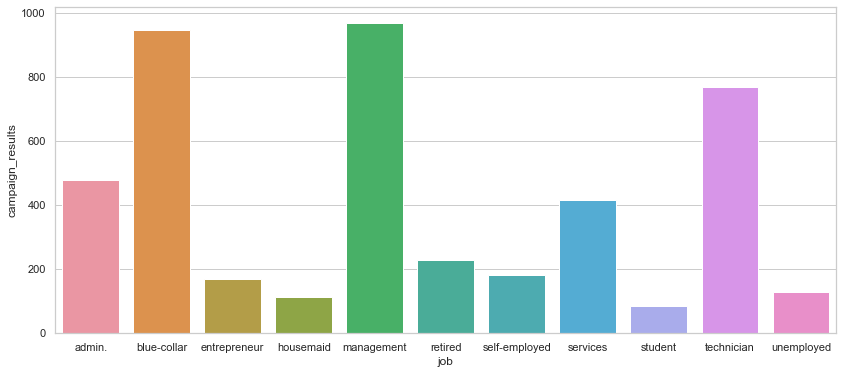

In [56]:
plt.figure(figsize=(14,6))
ax=sns.barplot(x='job',y='campaign_results',data=campaign_performance)

### Campaign Results by Job

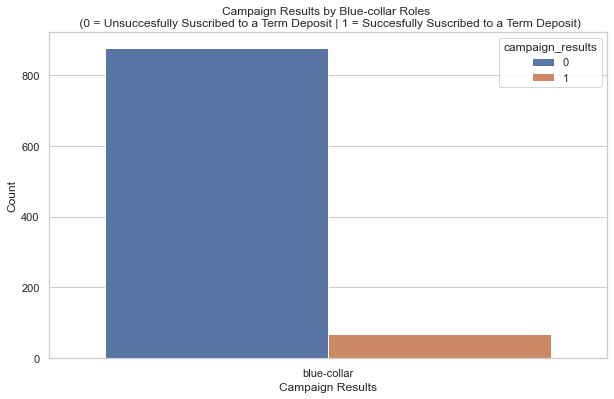

In [57]:
blue_collar_data = df2[df2['job'] == 'blue-collar']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=blue_collar_data, x='job', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Blue-collar Roles \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

### Campaign Results by Management Roles

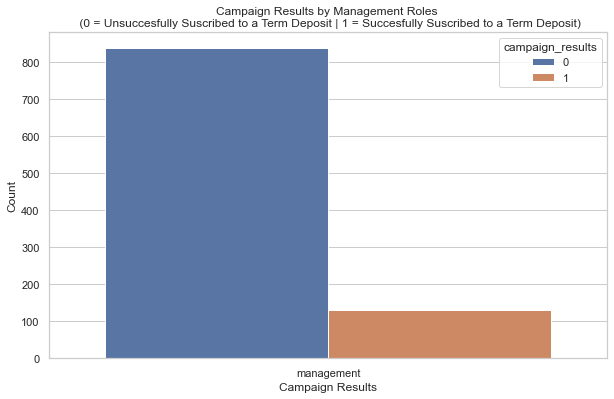

In [58]:
mangement_data = df2[df2['job'] == 'management']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=mangement_data, x='job', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Management Roles \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

In [59]:
mangement_data = df2[df2['job'] == 'management']

mangement_data_counts = mangement_data['campaign_results'].value_counts()

print(mangement_data_counts)

0    838
1    131
Name: campaign_results, dtype: int64


### Campaign Results by Technician Roles

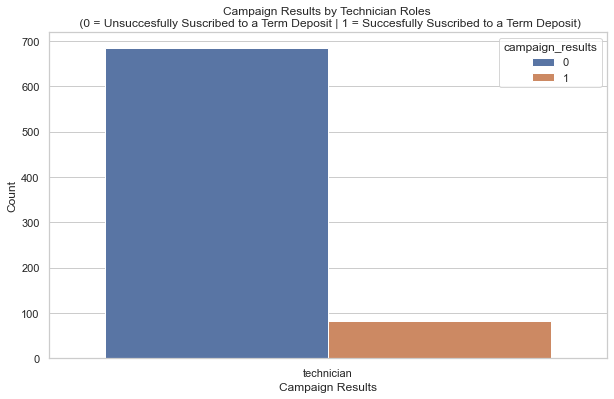

In [60]:
technician_data = df2[df2['job'] == 'technician']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=technician_data, x='job', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Technician Roles \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

In [61]:
technician_data = df2[df2['job'] == 'technician']

technician_data_counts = technician_data['campaign_results'].value_counts()

print(technician_data_counts)

0    685
1     83
Name: campaign_results, dtype: int64


> 2.4.1 Analysis of Relative Frequencies

In [62]:
value_counts=df2['job'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'job':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,job,Frequency,relative_frequencies
0,management,969,0.214333
1,blue-collar,946,0.209246
2,technician,768,0.169874
3,admin.,478,0.105729
4,services,417,0.092236
5,retired,230,0.050874
6,self-employed,183,0.040478
7,entrepreneur,168,0.037160
8,unemployed,128,0.028312
9,housemaid,112,0.024773


> 2.5 Campaign Results by Education

In [63]:
campaign_performance=df2.groupby('education',axis=0).count()
campaign_performance

,age,job,marital,bank_debt,avg_balance,housing_loan,personal_loan,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group
education,,,,,,,,,,,,,
primary,678,671,678,678,678,678,678,678,678,678,98,678,678
secondary,2306,2298,2306,2306,2306,2306,2306,2306,2306,2306,415,2306,2306
tertiary,1350,1342,1350,1350,1350,1350,1350,1350,1350,1350,266,1350,1350


### Education achieved Analysis

<Figure size 720x720 with 0 Axes>

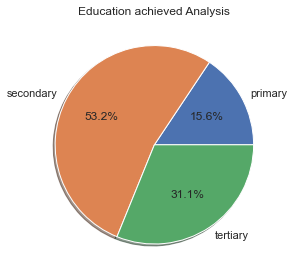

<Figure size 720x720 with 0 Axes>

In [64]:
educatiom_overview=['primary','secondary','tertiary']
campaign_performance['campaign_results'].plot(kind='pie', labels=educatiom_overview,radius=1,autopct='%1.1f%%', shadow = True)

plt.title('Education achieved Analysis')
plt.ylabel("")
plt.tight_layout()
plt.figure(figsize=(10, 10))

### Campaign Results by Education Achieved

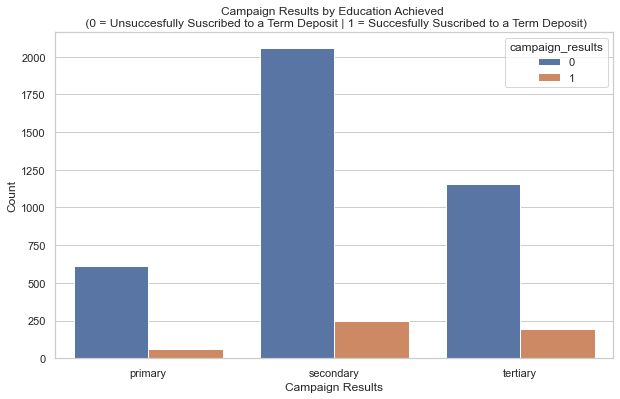

In [65]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=df2, x='education', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Education Achieved \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

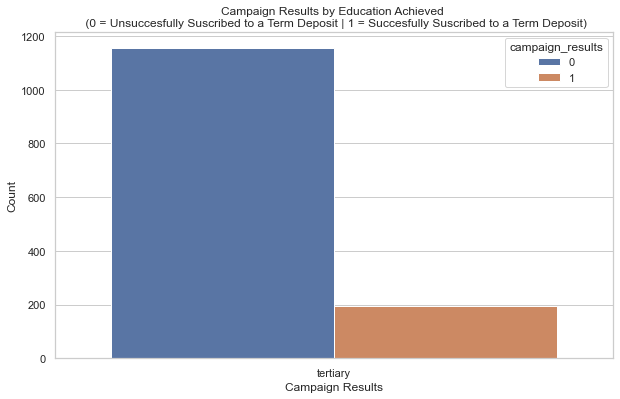

In [66]:
primary_education_data = df2[df2['education'] == 'primary']
secondary_education_data = df2[df2['education'] == 'secondary']
tertiary_education_data = df2[df2['education'] == 'tertiary']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=tertiary_education_data, x='education', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Education Achieved \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

In [67]:
tertiary_education_data = df2[df2['education'] == 'tertiary']

tertiary_education_counts = tertiary_education_data['campaign_results'].value_counts()

print(tertiary_education_counts)

0    1157
1     193
Name: campaign_results, dtype: int64


> 2.5.1 Analysis of Relative Frequencies

In [68]:
value_counts=df2['education'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'education':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,education,Frequency,relative_frequencies
0,secondary,2306,0.510064
1,tertiary,1350,0.298607
2,primary,678,0.149967


> 2.6 Campaign Results by Average Balance in the Bank

In [69]:
max_balance = df2['avg_balance'].max()
print("Maximum Balance:", max_balance)

Maximum Balance: 71188


In [70]:
min_balance = df2['avg_balance'].min()
print("Minimum Balance:", min_balance)

Minimum Balance: -3313


In [71]:
mean_balance = df2['avg_balance'].mean()
print("Mean Balance:", mean_balance)

Mean Balance: 1422.6578190665782


In order to study how sucessful was the campaing by the average balance in the bank account, we have decided to creat a new column grouping the column 'avg_balance' by group of balance where low is population from -3333 to 1421, standard from 1422 to 4000 and high from 4001 to 71188.

In [72]:
balance_distribution = [-3333, 1422, 4000, float('inf')]
balance_labels = ['low', 'standard', 'high']
df2['balance_clasification'] = pd.cut(df2['avg_balance'], bins=balance_distribution, labels=balance_labels, right=False)

In [73]:
df2.head()

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group,balance_clasification
0,30,unemployed,married,primary,0,1787,0,0,oct,1,0,NaN,0,Young,standard
1,33,services,married,secondary,0,4789,1,1,may,1,4,0.0,0,Young,high
2,35,management,single,tertiary,0,1350,1,0,apr,1,1,0.0,0,Adult,low
3,30,management,married,tertiary,0,1476,1,1,jun,4,0,NaN,0,Young,standard
4,59,blue-collar,married,secondary,0,0,1,0,may,1,0,NaN,0,Adult,low


In [74]:
balance_reached=df2.groupby('balance_clasification',axis=0).count()
balance_reached

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group
balance_clasification,,,,,,,,,,,,,,
low,3359,3334,3359,3231,3359,3359,3359,3359,3359,3359,3359,574,3359,3359
standard,729,720,729,695,729,729,729,729,729,729,729,150,729,729
high,433,429,433,408,433,433,433,433,433,433,433,92,433,433


### Group of People Reached by Average Balance in their Bank Account

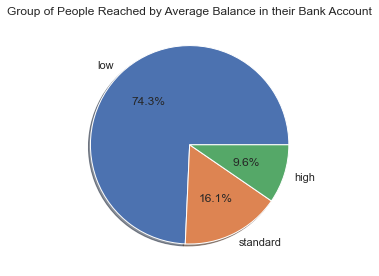

In [75]:
balance_group=['low','standard','high']
balance_reached['campaign_results'].plot(kind='pie', labels=balance_group,radius=1,autopct='%1.1f%%', shadow = True)
plt.title('Group of People Reached by Average Balance in their Bank Account')
plt.ylabel("")
plt.tight_layout()

### Campaign Results by Age Group

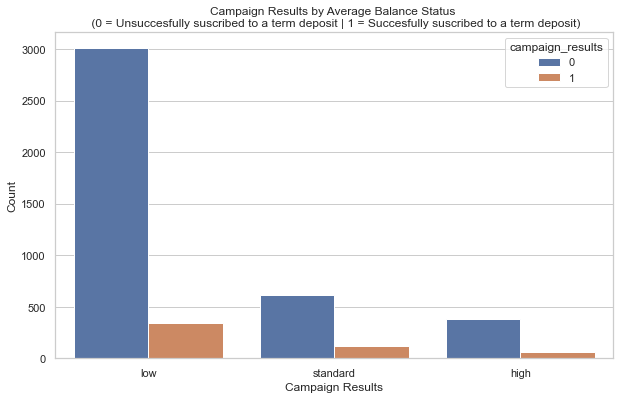

In [76]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=df2, x='balance_clasification', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Average Balance Status \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

### Campaign Results by Customer by Average Balance Status

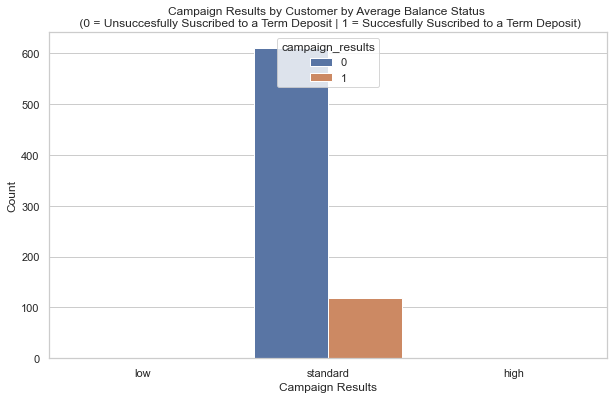

In [77]:
standard_bank_data = df2[df2['balance_clasification'] == 'standard']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=standard_bank_data , x='balance_clasification', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Customer by Average Balance Status \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

In [78]:
standard_bank_data = df2[df2['balance_clasification'] == 'standard']

campaign_results_counts = standard_bank_data['campaign_results'].value_counts()

print(campaign_results_counts)

0    611
1    118
Name: campaign_results, dtype: int64


In [79]:
df2.head()

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group,balance_clasification
0,30,unemployed,married,primary,0,1787,0,0,oct,1,0,NaN,0,Young,standard
1,33,services,married,secondary,0,4789,1,1,may,1,4,0.0,0,Young,high
2,35,management,single,tertiary,0,1350,1,0,apr,1,1,0.0,0,Adult,low
3,30,management,married,tertiary,0,1476,1,1,jun,4,0,NaN,0,Young,standard
4,59,blue-collar,married,secondary,0,0,1,0,may,1,0,NaN,0,Adult,low


> 2.6.1 Analysis of Relative Frequencies

In [80]:
value_counts=df2['avg_balance'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'balance_clasification':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,balance_clasification,Frequency,relative_frequencies
0,0,357,0.078965
1,2,24,0.005309
2,1,15,0.003318
3,4,13,0.002875
4,5,11,0.002433
...,...,...,...
2348,539,1,0.000221
2349,1041,1,0.000221
2350,464,1,0.000221
2351,7702,1,0.000221


In [81]:
value_counts=df2['balance_clasification'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'balance_clasification':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,balance_clasification,Frequency,relative_frequencies
0,low,3359,0.742977
1,standard,729,0.161248
2,high,433,0.095775


> 2.7 Campaign Results by Housing Loan Status

In [82]:
campaing_results=df2.groupby('housing_loan',axis=0).count()
campaing_results

,age,job,marital,education,bank_debt,avg_balance,personal_loan,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group,balance_clasification
housing_loan,,,,,,,,,,,,,,
0,1962,1925,1962,1858,1962,1962,1962,1962,1962,1962,300,1962,1962,1962
1,2559,2558,2559,2476,2559,2559,2559,2559,2559,2559,516,2559,2559,2559


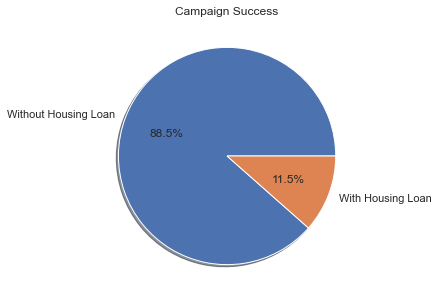

In [83]:
campaign_results_counts = df2['campaign_results'].value_counts()

labels = ['Without Housing Loan', 'With Housing Loan']

plt.figure(figsize=(6, 6))
plt.pie(campaign_results_counts, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Campaign Success')
plt.tight_layout()

plt.show()

In [84]:
#To make the graph easier to interpretate we have decided to change the column values of 'bank debt'.
df3=df2
df3['housing_loan'] = df2['housing_loan'].map({0: 'Without Housing Loan', 1:'With Housing Loan'})

### Campaign Results by Housing Loan Status

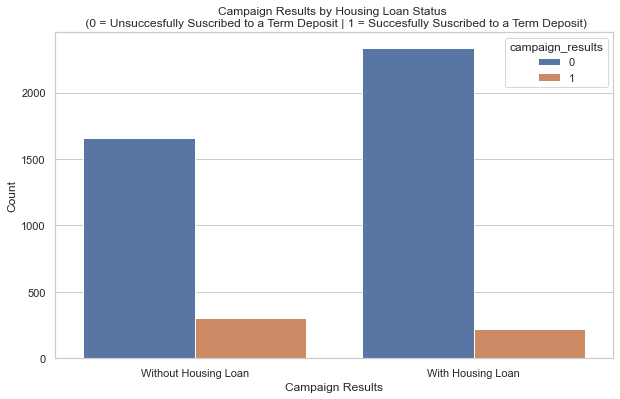

In [85]:
without_debt_data = df3[df3['housing_loan'] == 'Without Housing Loan']
with_debt_data = df3[df3['housing_loan'] == 'With Housing Loan']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=df3, x='housing_loan', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Housing Loan Status \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

### Campaign Results By Group With Housing Loan

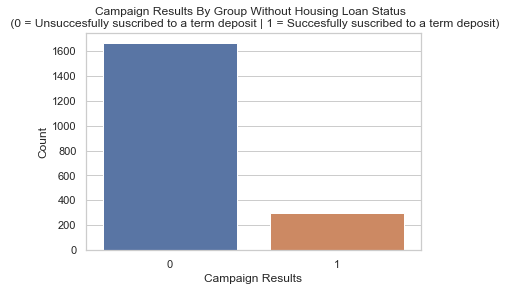

In [86]:
with_debt_data = df3[df3['housing_loan'] == 'With Housing Loan']

sns.countplot(data=without_debt_data, x='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results By Group Without Housing Loan Status  \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

In [87]:
with_debt_data = df3[df3['housing_loan'] == 'With Housing Loan']

with_debt_data_counts = with_debt_data['campaign_results'].value_counts()

print(with_debt_data_counts)

0    2339
1     220
Name: campaign_results, dtype: int64


### Note about previous code
As we can see, only 220 out of 4521 people with a housing loan are successfully interested in a bank term deposit.

### Campaign Results By Group Without Housing Loan

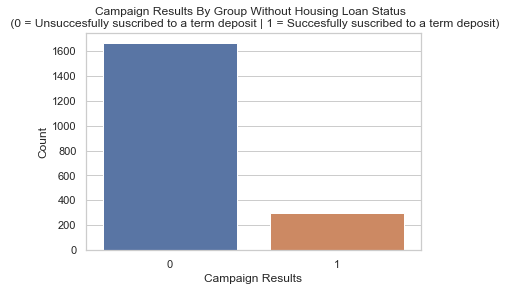

In [88]:
without_debt_data = df3[df3['housing_loan'] == 'Without Housing Loan']

sns.countplot(data=without_debt_data, x='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results By Group Without Housing Loan Status  \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

In [89]:
without_debt_data = df3[df3['housing_loan'] == 'Without Housing Loan']

without_debt_data_counts = without_debt_data['campaign_results'].value_counts()

print(without_debt_data_counts)

0    1661
1     301
Name: campaign_results, dtype: int64


> 2.7.1 Analysis of Relative Frequencies

In [90]:
value_counts=df2['housing_loan'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'housing_loan':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,housing_loan,Frequency,relative_frequencies
0,With Housing Loan,2559,0.566025
1,Without Housing Loan,1962,0.433975


In [91]:
#Restoring the column to categorical values
#df2=df3
#df2['housing_loan'] = df3['housing_loan'].map({'Without Housing Loan':0, 1:'With Housing Loan'})

> 2.8 Campaign Results by Personal Loan Status

In [92]:
campaing_results=df2.groupby('personal_loan',axis=0).count()
campaing_results

,age,job,marital,education,bank_debt,avg_balance,housing_loan,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group,balance_clasification
personal_loan,,,,,,,,,,,,,,
0,3830,3793,3830,3650,3830,3830,3830,3830,3830,3830,717,3830,3830,3830
1,691,690,691,684,691,691,691,691,691,691,99,691,691,691


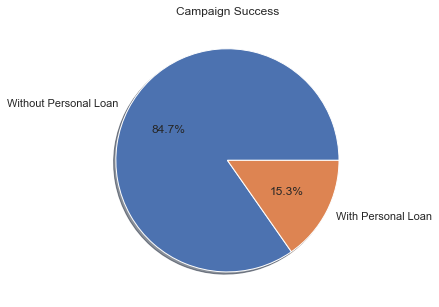

In [93]:
campaign_results_counts = df2['personal_loan'].value_counts()

labels = ['Without Personal Loan', 'With Personal Loan']

plt.figure(figsize=(6, 6))
plt.pie(campaign_results_counts, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Campaign Success')
plt.tight_layout()

plt.show()

In [94]:
#To make the graph easier to interpretate we have decided to change the column values of 'personal_loan'.
df3=df2
df3['personal_loan'] = df2['personal_loan'].map({0: 'Without personal Loan', 1:'With personal Loan'})

### Campaign Results by Personal Loan Status

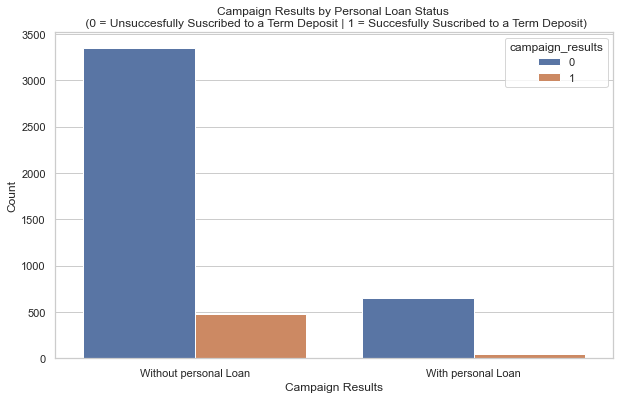

In [95]:
without_debt_data = df3[df3['personal_loan'] == 'Without personal Loan']
with_debt_data = df3[df3['personal_loan'] == 'With personal Loan']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=df3, x='personal_loan', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Personal Loan Status \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

### Campaign Results By Group With Personal Loan

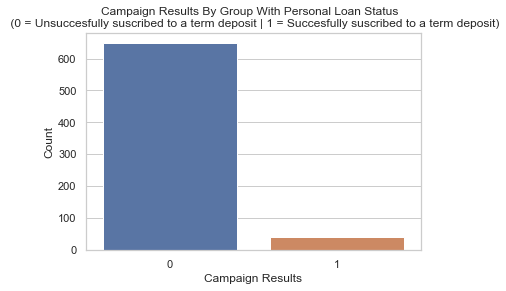

In [96]:
with_debt_data = df3[df3['personal_loan'] == 'With personal Loan']

sns.countplot(data=with_debt_data, x='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results By Group With Personal Loan Status  \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

In [97]:
with_debt_data = df3[df3['personal_loan'] == 'With personal Loan']

with_debt_data_counts = with_debt_data['campaign_results'].value_counts()

print(with_debt_data_counts)

0    648
1     43
Name: campaign_results, dtype: int64


### Note about previous code
As we can see, only 43 out of 4521 people with a housing loan are successfully interested in a bank term deposit.

### Campaign Results By Group Without Personal Loan

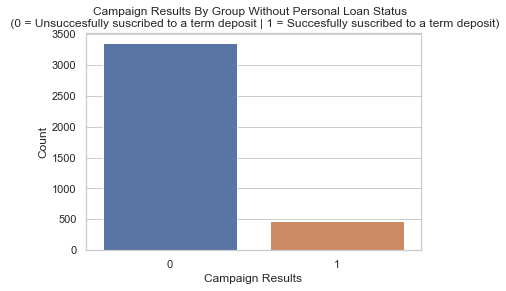

In [98]:
with_debt_data = df3[df3['personal_loan'] == 'Without personal Loan']

sns.countplot(data=without_debt_data, x='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results By Group Without Personal Loan Status  \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

In [99]:
with_debt_data = df3[df3['personal_loan'] == 'Without personal Loan']

with_debt_data_counts = with_debt_data['campaign_results'].value_counts()

print(with_debt_data_counts)

0    3352
1     478
Name: campaign_results, dtype: int64


> 2.8.1 Analysis of Relative Frequencies

In [100]:
value_counts=df2['personal_loan'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'personal_loan':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,personal_loan,Frequency,relative_frequencies
0,Without personal Loan,3830,0.847158
1,With personal Loan,691,0.152842


In [101]:
#Restoring the column to categorical values
#df2=df3
#df2['personal_loan'] = df3['personal_loan'].map({'Without Personal Loan':0, 1:'With Personal Loan'})

> 2.9 Campaign Results by Bank Debt Status

In [102]:
campaign_performance=df2.groupby('bank_debt',axis=0).count()
campaign_performance

,age,job,marital,education,avg_balance,housing_loan,personal_loan,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group,balance_clasification
bank_debt,,,,,,,,,,,,,,
0,4445,4407,4445,4261,4445,4445,4445,4445,4445,4445,811,4445,4445,4445
1,76,76,76,73,76,76,76,76,76,76,5,76,76,76


### Bank Debt Overview

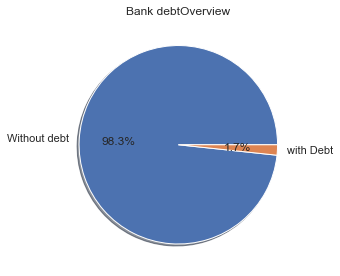

In [103]:
bank_debt_ovreview=['Without debt','with Debt']
campaign_performance['campaign_results'].plot(kind='pie', labels=bank_debt_ovreview,radius=1,autopct='%1.1f%%', shadow = True)
plt.title('Bank debtOverview')
plt.ylabel("")
plt.tight_layout()

In [104]:
#To make the graph easier to interpretate we have decided to change the column values of 'bank debt'
df3=df2
df3['bank_debt'] = df2['bank_debt'].map({0: 'Without Bank Debt', 1:'With Bank Debt'})

### Campaign Results by Bank Debt Status

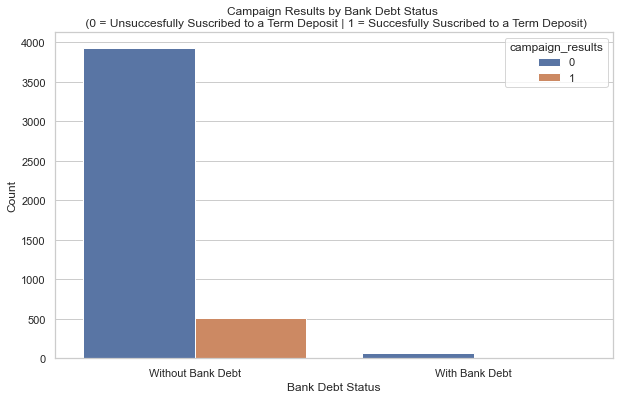

In [105]:
without_debt_data = df3[df3['bank_debt'] == 'Without Bank Debt']
with_debt_data = df3[df3['bank_debt'] == 'With Bank Debt']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=df3, x='bank_debt', hue='campaign_results')

plt.xlabel('Bank Debt Status')
plt.ylabel('Count')
plt.title('Campaign Results by Bank Debt Status \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

In [106]:
with_debt_data = df3[df3['bank_debt'] == 'With Bank Debt']

with_debt_data_counts = with_debt_data['campaign_results'].value_counts()

print(with_debt_data_counts)

0    67
1     9
Name: campaign_results, dtype: int64


### Campaign Results By Group Without Bank Debt

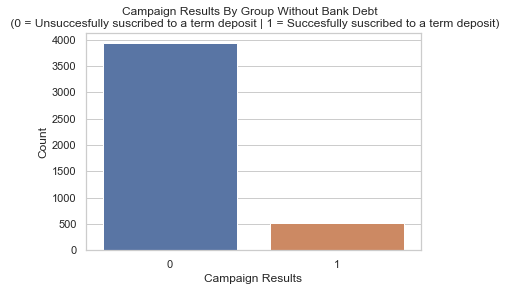

In [107]:
without_debt_data = df3[df3['bank_debt'] == 'Without Bank Debt']

sns.countplot(data=without_debt_data, x='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results By Group Without Bank Debt  \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

In [108]:
without_debt_data = df3[df3['bank_debt'] == 'Without Bank Debt']

without_debt_data_counts = without_debt_data['campaign_results'].value_counts()

print(without_debt_data_counts)

0    3933
1     512
Name: campaign_results, dtype: int64


> 2.9.1 Analysis of Relative Frequencies

In [109]:
value_counts=df3['bank_debt'].value_counts()
relative_frequencies=value_counts/len(df3)
subtable=pd.DataFrame({'bank_debt':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,bank_debt,Frequency,relative_frequencies
0,Without Bank Debt,4445,0.98319
1,With Bank Debt,76,0.01681


In [110]:
#Restoring the column to categorical values
#df2=df3
#df2['bank_debt'] = df3['bank_debt'].map({'Without Bank Debt':0, 1:'With Bank Debt'})

> 2.9 Summary Analysis

In [111]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    4521 non-null   int64   
 1   job                    4483 non-null   object  
 2   marital                4521 non-null   object  
 3   education              4334 non-null   object  
 4   bank_debt              4521 non-null   object  
 5   avg_balance            4521 non-null   int64   
 6   housing_loan           4521 non-null   object  
 7   personal_loan          4521 non-null   object  
 8   month                  4521 non-null   object  
 9   n_contacts_done        4521 non-null   int64   
 10  pre_n_contacts_done    4521 non-null   int64   
 11  results_prev_campains  816 non-null    float64 
 12  campaign_results       4521 non-null   int64   
 13  age_group              4521 non-null   category
 14  balance_clasification  4521 non-null   c

In [112]:
df2.describe()

,age,avg_balance,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results
count,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.170095,1422.657819,2.793630,0.542579,0.158088,0.115240
std,10.576211,3009.638142,3.109807,1.693562,0.365047,0.319347
min,19.000000,-3313.000000,1.000000,0.000000,0.000000,0.000000
25%,33.000000,69.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,444.000000,2.000000,0.000000,0.000000,0.000000
75%,49.000000,1480.000000,3.000000,0.000000,0.000000,0.000000
max,87.000000,71188.000000,50.000000,25.000000,1.000000,1.000000


> 2.9.1 Numerical Features

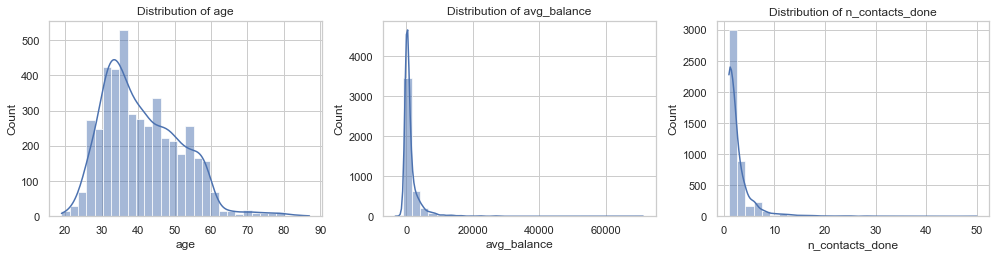

In [113]:
# Set the style and size for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# List of numerical features
numerical_features = ['age', 'avg_balance','n_contacts_done']

# Plot the distribution of numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df2[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

- Customers contacted by age are a group of population following a Normal Distribution in the Data.
- The Average balance of customers in their bank accounts are following a Normal Distribution in the aata.
- The number of times customerrs where contacted are following a Poisson Distribution in the data.

> 2.9.1.1 Distribution of age

In [114]:
age_mean = df2['age'].mean()
age_std = df2['age'].std()
print("Mean age:", age_mean)
print("Standard Deviation of age:", age_std)

Mean age: 41.17009511170095
Standard Deviation of age: 10.576210958711275


### Conclusion
- The average age of customers reached during the campaign is 41, with the majority of pupation analysed within +/- 10 years of this age.

> 2.9.1.2 Distribution of average balance

In [115]:
balance_mean = df2['avg_balance'].mean()
balance_std = df2['avg_balance'].std()
print("Mean age:", balance_mean)
print("Standard Deviation of Average balance:", balance_std)

Mean age: 1422.6578190665782
Standard Deviation of Average balance: 3009.6381424673496


### Conclusion
- The balance average of customers reached during the campaign is 1422€, with the majority of pupation analysed within +/- 3000€ of this amount.

> 2.9.2 Categorical Features

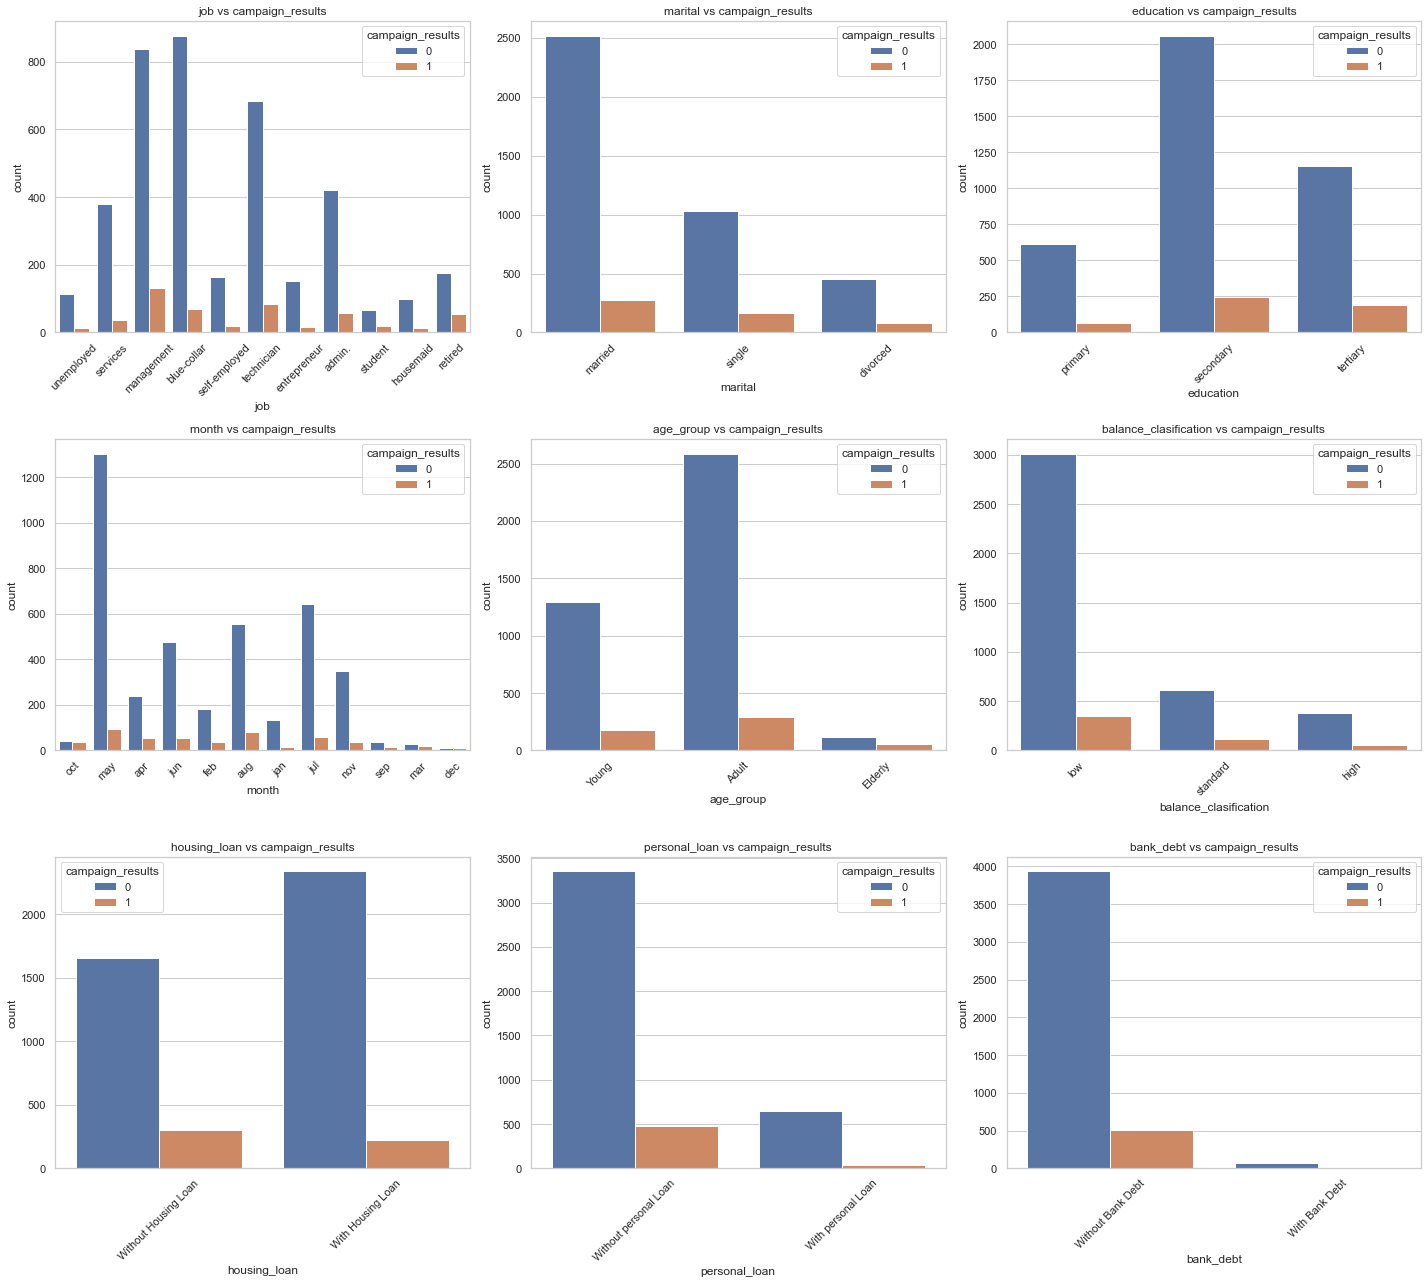

In [116]:
# List of categorical features
categorical_features = ['job', 'marital', 'education', 'month','age_group','balance_clasification','housing_loan','personal_loan','bank_debt']

# Set the size for the plots
plt.figure(figsize=(20, 18))

# Plot the distribution of categorical features in relation to the target variable 'deposit'
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df2, x=feature, hue='campaign_results')
    plt.title(f'{feature} vs campaign_results')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

> 2.9.2.1 Job vs Campaign Results

- People in management roles are more likely to subscribe to a term deposit followed by technicians.

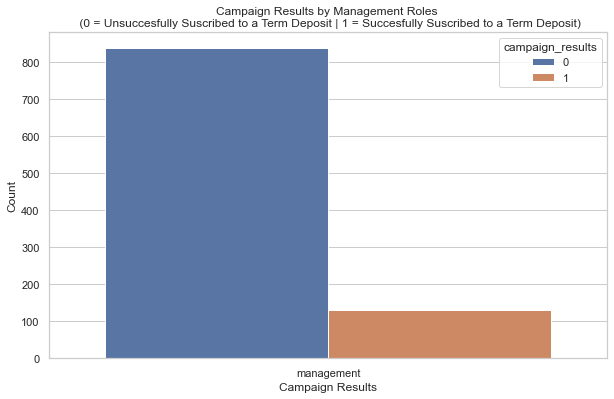

In [117]:
mangement_data = df2[df2['job'] == 'management']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=mangement_data, x='job', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Management Roles \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

In [118]:
mangement_data = df2[df2['job'] == 'management']

mangement_data_counts = mangement_data['campaign_results'].value_counts()

print(mangement_data_counts)

0    838
1    131
Name: campaign_results, dtype: int64


In [119]:
mangement_data_percentage = mangement_data_counts / mangement_data_counts.sum() * 100

print(mangement_data_percentage)

0    86.480908
1    13.519092
Name: campaign_results, dtype: float64


### Conclusion
- 13.5% of contacted managers are interested in a term deposit.

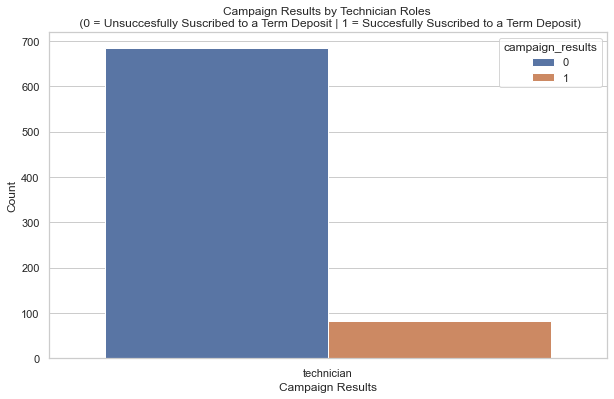

In [120]:
technician_data = df2[df2['job'] == 'technician']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=technician_data, x='job', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Technician Roles \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

In [121]:
technician_data = df2[df2['job'] == 'technician']

technician_data_counts = technician_data['campaign_results'].value_counts()

print(technician_data_counts)

0    685
1     83
Name: campaign_results, dtype: int64


In [122]:
technician_data_percentage = technician_data_counts / technician_data_counts.sum() * 100

print(technician_data_percentage)

0    89.192708
1    10.807292
Name: campaign_results, dtype: float64


### Conclusion
- 10.8% of contacted technicians are interested in a term deposit.

> 2.9.2.2 Marital vs Campaign Results

- We could consider single customers as customers who are more likely to subscribe to a term deposit, as they seem to be proportionally more interested in them.

### Note

- This conclusion may be subject to confirmation.

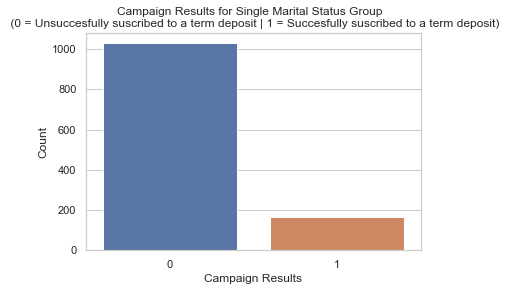

In [123]:
single_data = df2[df2['marital'] == 'single']

sns.countplot(data=single_data, x='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results for Single Marital Status Group  \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

In [124]:
single_data = df2[df2['marital'] == 'single']
single_data_counts = single_data['campaign_results'].value_counts()

print(single_data_counts)

0    1029
1     167
Name: campaign_results, dtype: int64


In [125]:
single_data_percentage = single_data_counts / single_data_counts.sum() * 100

print(single_data_percentage)

0    86.036789
1    13.963211
Name: campaign_results, dtype: float64


### Conclusion
- 13.9% of contacted single customers are interested in a term deposit.

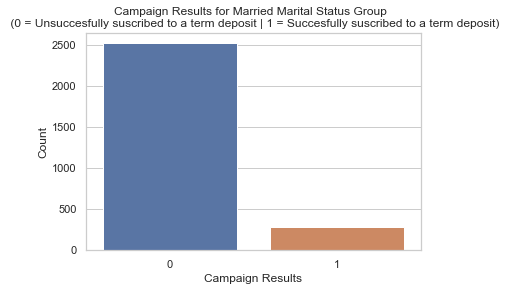

In [126]:
single_data = df2[df2['marital'] == 'married']

sns.countplot(data=single_data, x='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results for Married Marital Status Group  \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

In [127]:
married_data = df2[df2['marital'] == 'married']
married_data_counts = single_data['campaign_results'].value_counts()

print(married_data_counts)

0    2520
1     277
Name: campaign_results, dtype: int64


In [128]:
married_data_percentage = married_data_counts / married_data_counts.sum() * 100

print(married_data_percentage)

0    90.096532
1     9.903468
Name: campaign_results, dtype: float64


### Conclusion
- 9.9% of contacted married customers are interested in a term deposit.

> 2.9.2.3 Education vs Campaign Results

- Customers who have attained tertiary education may be more likely to subscribe to a term deposit, as they appear to exhibit heightened interest in these financial products. Conversely, those who have only completed primary education are potentially more risky prospects for such offerings, whereas individuals with secondary-level qualifications may display a lower propensity to invest in term deposits.

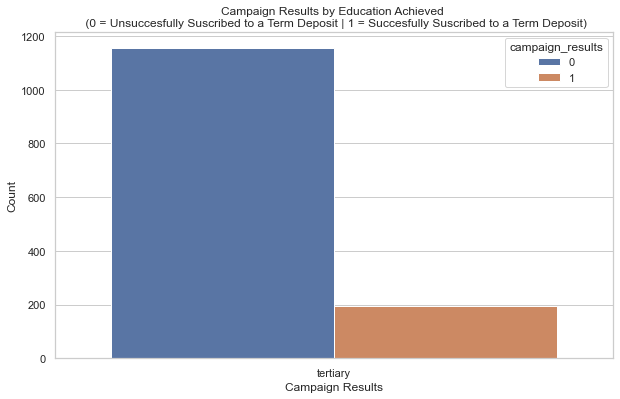

In [129]:
primary_education_data = df2[df2['education'] == 'primary']
secondary_education_data = df2[df2['education'] == 'secondary']
tertiary_education_data = df2[df2['education'] == 'tertiary']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=tertiary_education_data, x='education', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Education Achieved \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

In [130]:
tertiary_education_data = df2[df2['education'] == 'tertiary']

tertiary_education_counts = tertiary_education_data['campaign_results'].value_counts()

print(tertiary_education_counts)

0    1157
1     193
Name: campaign_results, dtype: int64


In [131]:
tertiary_education_percentage = tertiary_education_counts / tertiary_education_counts.sum() * 100

print(tertiary_education_percentage)

0    85.703704
1    14.296296
Name: campaign_results, dtype: float64


### Conclusion
- 14.2% of people with a third level education are interested in a term deposit.

> 2.9.2.4 Age group vs Campaign Results

- Married customers are deemed more suitable for term deposit offers since young customers are perceived as precarious prospects, and the elderly may not be inclined to show interest for commercial strategic reasons.

### Note

- Further analysis may be required to examine the classification of young clients as vulnerable candidates.

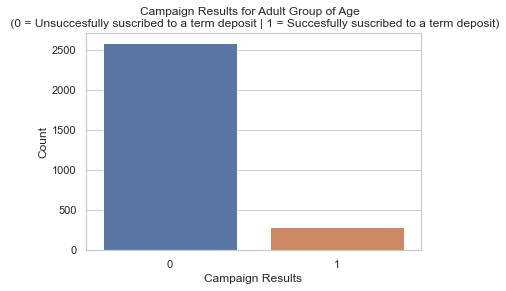

In [132]:
adult_data = df2[df2['age_group'] == 'Adult']

sns.countplot(data=adult_data, x='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results for Adult Group of Age  \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

In [133]:
adult_data = df2[df2['age_group'] == 'Adult']
adult_data_counts = adult_data['campaign_results'].value_counts()

print(adult_data_counts)

0    2587
1     288
Name: campaign_results, dtype: int64


In [134]:
adult_data_percentage = adult_data_counts / adult_data_counts.sum() * 100

print(adult_data_percentage)

0    89.982609
1    10.017391
Name: campaign_results, dtype: float64


### Conclusion
- 10.0% of adult people are interested in a term deposit.

> 2.9.2.5 Balance classification vs Campaign Results

- Although we could adopt a more conservative approach and target customers with a high average balance, we have decided to concentrate on clients with a regular balance who are more statistically inclined to apply for a term deposit.

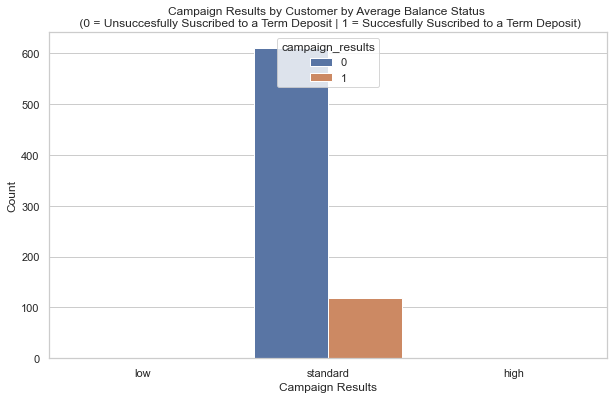

In [135]:
standard_bank_data = df2[df2['balance_clasification'] == 'standard']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=standard_bank_data , x='balance_clasification', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Customer by Average Balance Status \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

In [136]:
standard_bank_data = df2[df2['balance_clasification'] == 'standard']

campaign_results_counts = standard_bank_data['campaign_results'].value_counts()

print(campaign_results_counts)

0    611
1    118
Name: campaign_results, dtype: int64


In [137]:
standard_bank_percentage = campaign_results_counts / campaign_results_counts.sum() * 100

print(standard_bank_percentage)

0    83.813443
1    16.186557
Name: campaign_results, dtype: float64


### Conclusion
- 16.18% of people with a standard average balance in their bank account are interested in a term deposit.

> 2.9.3 Definition of Potencial Customer

### Based on the study delivered in previous steps we have defined our potencial client more likely to suscribe a term deposit a customer with:
- A Management role
- Single
- Having attained tertiary education
- Adult
- In posetion of a Standard Average balance account.

3. Exploratory Data Analysis of Insightful Features

> 3.1. What is the probability adult people sucesfully suscribe to a term deposit?

In [138]:
data = pd.crosstab(df2['age_group'], df2['campaign_results'])

observed = data.loc['Adult', 1]

total_adults = data.loc['Adult'].sum()

observed_rest = data.loc[['Young', 'Elderly'], 1].sum()

total_rest = data.loc[['Young', 'Elderly']].sum().sum()

probability = observed / total_adults

expected = pd.DataFrame({
    'Adult': [total_adults * (observed_rest + observed) / (total_adults + total_rest)],
    'Young/Elderly': [total_rest * (observed_rest + observed) / (total_adults + total_rest)]})

print("Probability of getting 1 in 'campaign_results' for adults:", probability)


Probability of getting 1 in 'campaign_results' for adults: 0.10017391304347827


> 3.2. What is the probability that customers from the database are adults? 

In [139]:
age_group_counts = df2['age_group'].value_counts()
probability_adult = age_group_counts['Adult'] / age_group_counts.sum()

print("Probability of customers are adults:", round(probability_adult*100,2),"%")

Probability of customers are adults: 63.59 %


### Adult sample of customers who are 35 and 41 years old.

- 35 years old

In [140]:
mean_age = df2['age'].mean()
std_age = df2['age'].std()

Adult = 35

# Calculate the probability that 'age_group' is equal to the given value using the CDF
probability_age_35 = stats.norm.cdf(Adult, loc=mean_age, scale=std_age)

print("Probability of age_group being 1:", round(probability_age_35,2), "%")

Probability of age_group being 1: 0.28 %


- 41 years old

In [141]:
mean_age = df2['age'].mean()
std_age = df2['age'].std()

Adult = df2['age'].mean()

# Calculate the probability that 'age_group' is equal to the given value using the CDF
probability_age_41 = stats.norm.cdf(Adult, loc=mean_age, scale=std_age)

print("Probability customers being 41 years old:", probability_age_41)

Probability customers being 41 years old: 0.5


> 3.3. What is the probability that customers from the database are single?

In [142]:
marital_counts = df2['marital'].value_counts()
probability_single = marital_counts['single'] / marital_counts.sum()

print("Probability of 'customers are single:", round(probability_single*100,2),'%')

Probability of 'customers are single: 26.45 %


### Note previous code
Since the marital is a categorical column we can not perform further statistics analysis.

> 3.4 What is the probability that customers have a standard average balance in their bank account?

In [143]:
avg_balance_counts = df2['balance_clasification'].value_counts()
probability_average = avg_balance_counts['standard'] / avg_balance_counts.sum()

print("Probability of customers have an standard average balance in their account:", round(probability_average,2),'%')

Probability of customers have an standard average balance in their account: 0.16 %


### Note about previous code
Since the balance_clasification is a categorical column we can not perform further statistics analysis.

> 3.5 What is the probability that customers have a tertiary level education?

In [144]:
education_counts = df2['education'].value_counts()
probability_tertiary = education_counts['tertiary'] / education_counts.sum()

print("Probability of customers have a tertiary level education:", round(probability_tertiary,2),'%')

Probability of customers have a tertiary level education: 0.31 %


> 3.6 Features to focus on in order to increase Potencial Customer

4. Probability of managers successfully subscribing to a term deposit

- p = Probability of successfully 'management' customers suscribe to a term deposit

In [203]:
managment_customers = df2[df2['job'] == 'management']
success_count_managers = managment_customers['campaign_results'].sum()
total_count_managers = len(managment_customers)
probability_success_managers = success_count_managers / total_count_managers

print("Probability of managers successfully subscribing to a term deposit: p:", round(probability_success_managers*100,2),'%')

Probability of managers successfully subscribing to a term deposit: p: 13.52 %


- n = Number of people with management roles.

In [147]:
total_count_managers = len(managment_customers)
print("Number of people with management roles: n: ", total_count_managers)

Number of people with management roles: n:  969


In [202]:
n = 969
p = 0.14

# Probability of exactly 100 managers successfully subscribing to a term deposit 
probability_20_purchases = stats.binom.pmf(100, n, p)

# Probability of more than 50  managers successfully subscribing to a term deposit 
probability_more_than_136_purchases = 1 - stats.binom.cdf(136, n, p)

# Expected number of customers making a purchase
expected_purchases = n * p

print("Probability of exactly 20 purchases:", round(probability_136_purchases*100,2),'%')
print("Probability of more than 50 purchases:",  round(probability_more_than_136_purchases*100,2),'%')
print("Expected number of purchases:", round(expected_purchases,0))

Probability of exactly 20 purchases: 0.01 %
Probability of more than 50 purchases: 46.46 %
Expected number of purchases: 136.0


### References

archive.ics.uci.edu. (n.d.). UCI Machine Learning Repository. [online] Available at: https://archive.ics.uci.edu/dataset/222/bank+marketing [Acceesed 05 Nov 2023].

pandas.pydata.org. (n.d.). pandas.cut — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.cut.html [Acceesed 05 Nov 2023].